## Bikes Sales in Europe - EDA Python

### 1. Import libraries and dataframe

### 2. Data wrangling 
    - Dropping columns
    - Renaming columns
    - Replace Initial with the full name
    
### 3. Data Consistency Checks
    - Find and address mixed type variables
    - Find and address missing values
    - Find and address duplicate values

## 1. Import libraries and dataframe

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
# Import dataframe

path = r'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

path

'/Users/eriseldabaci/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design/Bikes Sales in Europe'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data','Original Data','Sales.csv'))

In [5]:
df.shape

(113036, 18)

In [6]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [7]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [8]:
df.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [10]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


##### - Notes: The "Unit_Cost", "Unit_Price", "Profit", "Cost"  and "Revenue" variables have a large range of values between min and max. The average or mean for the "Unit_Cost", "Unit_Price", "Profit", "Cost"  and "Revenue" variables which are higher than the median indicating that there may be some outliers or high-priced - high-costed items in the dataset. The minimum profit is -30, suggesting that some products resulted in losses. 

### 2. Data wrangling 

In [11]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')


## - Dropping columns

In [12]:
# Drop columns "Date" isn't relevant for the purpose of the analysis and the 'Revenue' isn't the right csalculation

df = df.drop(columns = ['Date','Revenue'])


In [13]:
# Since the Revenue column is not correctly calculated, we dropped the exist column and create a new one

Revenue= df['Order_Quantity']*df['Unit_Price']

df['Revenue'] = Revenue

df.head(3)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
2,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760


    ### -Replace initials with full name

In [14]:
df['Customer_Gender'].replace('M','Male', inplace=True)
df['Customer_Gender'].replace('F','Female', inplace=True)

df.head(3)
    

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
1,26,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,960
2,23,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2760


## 3. Data Consistency Checks


In [15]:
# Checked for mixed-type

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0: 
    print (col)  # - There isn't any mixed-type data.

In [16]:
# Finding Missing Values

df.isnull().sum()  # - There isn't any missing values.

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [17]:
# Checked for dublicated

df_dups = df[df.duplicated()] ## - There isn't any dublicate values.

# Check the output

df_dups.shape

(1000, 17)

In [18]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113031    False
113032    False
113033    False
113034    False
113035    False
Length: 113036, dtype: bool

In [19]:
# Remove the duplicated values

df=df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               112036 non-null  int64 
 1   Month             112036 non-null  object
 2   Year              112036 non-null  int64 
 3   Customer_Age      112036 non-null  int64 
 4   Age_Group         112036 non-null  object
 5   Customer_Gender   112036 non-null  object
 6   Country           112036 non-null  object
 7   State             112036 non-null  object
 8   Product_Category  112036 non-null  object
 9   Sub_Category      112036 non-null  object
 10  Product           112036 non-null  object
 11  Order_Quantity    112036 non-null  int64 
 12  Unit_Cost         112036 non-null  int64 
 13  Unit_Price        112036 non-null  int64 
 14  Profit            112036 non-null  int64 
 15  Cost              112036 non-null  int64 
 16  Revenue           112036 non-null  int

## 4. Some useful visualizations
    ### Age Distribution of Customers
    ### Most Profitable Year
    ### Revenue Based on Country

###   Age Distribution of Customers

In [20]:
age_group_data=df['Age_Group'].value_counts()
age_group_data

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

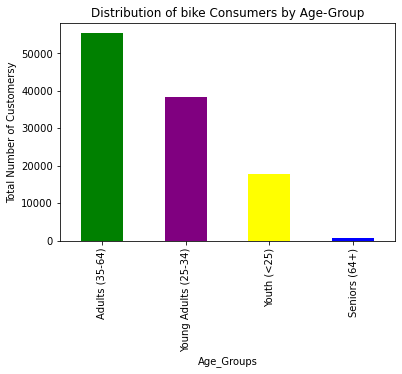

In [21]:
# Analysing the distribution Using the Bar chart' for 'Age_Group'

age_group_data = df['Age_Group'].value_counts().plot.bar(color=['green', 'purple','yellow', 'blue'])

plt.title('Distribution of bike Consumers by Age-Group')
plt.xlabel('Age_Groups')
plt.ylabel('Total Number of Customersy')

# Export the bar chart as a PNG image
                                    
age_group_data.figure.savefig(os.path.join(path, '04 Visualizations','Total Number of Customers.png'))


### Most Profitable Year

In [22]:
grouped_year_data = df.groupby('Year').sum()['Profit'].sort_values(ascending=False)

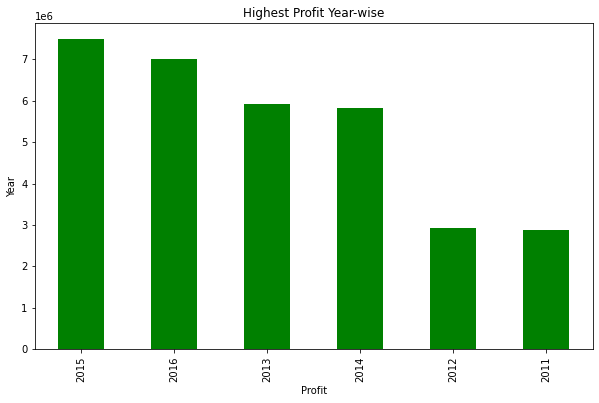

In [23]:
# Analysing the distribution Using the Bar chart' for Most Profitable Year

fig=grouped_year_data.plot.bar(color=['green'])

plt.title('Highest Profit Year-wise')
plt.xlabel('Profit')
plt.ylabel('Year')

# Export the bar chart as a PNG image

fig.figure.set_size_inches(10, 6)
fig.figure.savefig(os.path.join(path, '04 Visualizations','Highest Profit Year-wise.png'), dpi=100)


### Revenue Based on Country

In [24]:
grouped_country = df.groupby('Country').sum()['Revenue'].sort_values(ascending=False)

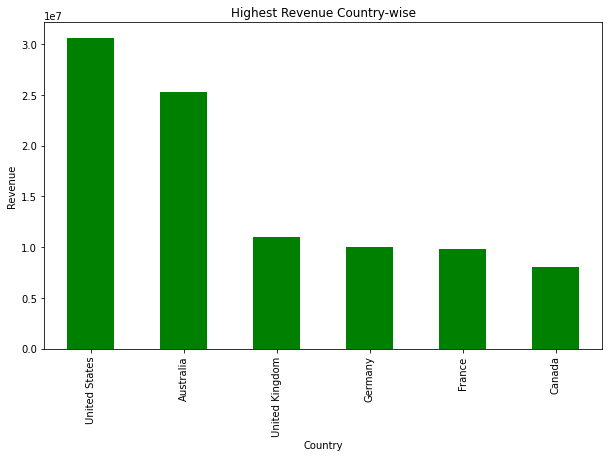

In [25]:
# Analysing the distribution Using the Bar chart' for Highest Revenue Country-wise

fig=grouped_country.plot.bar(color=['green'])

plt.title('Highest Revenue Country-wise')
plt.xlabel('Country')
plt.ylabel('Revenue')

# Export the bar chart as a PNG image

fig.figure.set_size_inches(10, 6)
fig.figure.savefig(os.path.join(path, '04 Visualizations','Highest Revenue Country-wise.png'), dpi=100)



### Profit By Product Category

In [26]:
Grouped_product = df.groupby('Product_Category').sum()['Profit'].sort_values(ascending=False)

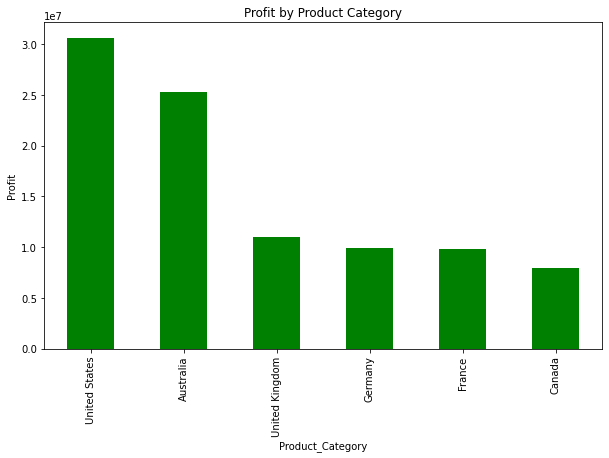

In [27]:
# Analysing the distribution Using the Bar chart' for Profit by Product Category

fig=grouped_country.plot.bar(color=['green'])

plt.title('Profit by Product Category')
plt.xlabel('Product_Category')
plt.ylabel('Profit')

# Export the bar chart as a PNG image

fig.figure.set_size_inches(10, 6)
fig.figure.savefig(os.path.join(path, '04 Visualizations','Profit by Product Category.png'), dpi=100)

### Profit By Sub-Category

In [28]:
grouped_subcategory = df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False).head(5)

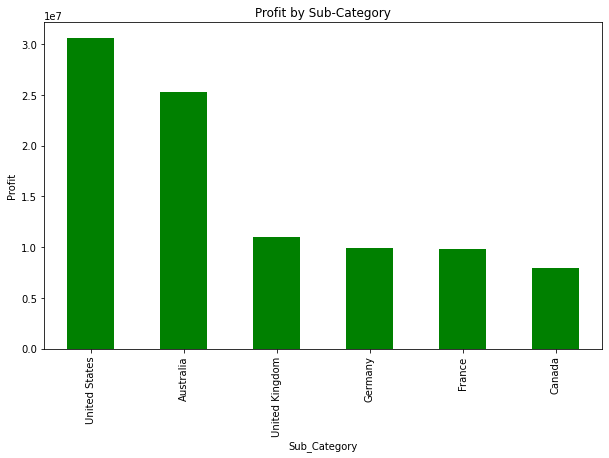

In [29]:
# Analysing the distribution Using the Bar chart' for Profit by Sub-Category

fig=grouped_country.plot.bar(color=['green'])

plt.title('Profit by Sub-Category')
plt.xlabel('Sub_Category')
plt.ylabel('Profit')

# Export the bar chart as a PNG image

fig.figure.set_size_inches(10, 6)
fig.figure.savefig(os.path.join(path, '04 Visualizations','Profit by Sub-Category.png'), dpi=100)

In [32]:
## Export Data frame CSV file.

df.to_csv(os.path.join(path,'02 Data','Prepare Data', 'bike_sales.csv'))

In [33]:
df.shape

(112036, 17)